# EPL Data Analysis with Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Inspecting and Understanding the Data

In [2]:
# Read the CSV file with detected encoding
nRowsRead = 2600
epl = pd.read_csv('/content/epl_results.csv', delimiter = ',', nrows = nRowsRead)
epl.dataframeName = 'epl_results.csv'

nRow, nCol = epl.shape
print(f'There are {nRow} rows and {nCol} columns')

epl.head()

There are 2600 rows and 23 columns


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# List of all the columns
columns = epl.columns
print(columns)

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')


## Removal/ dropping null values

We first check which columns in the dataframe have null values

In [4]:
# Columns with null/ NaN values
epl.isnull().sum()

,0
Season,0
DateTime,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
FTR,0
HTHG,924
HTAG,924
HTR,924


In [5]:
# Boolean alternative to the isnull() method {I much prefer the isnull() method to this one :)}
epl.isna().any()

,0
Season,False
DateTime,False
HomeTeam,False
AwayTeam,False
FTHG,False
FTAG,False
FTR,False
HTHG,True
HTAG,True
HTR,True


From the analysis above, the columns are divided to three; some don't have any null values, some have a few null values and in some all of their rows have null values. We are going to drop the columns with all null values.

In [6]:
# Dropping the columns with null data in all their rows
df = epl.dropna(axis=1, how='all')

nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

df_columns = df.columns
print(df_columns)

df.head()

There are 2600 rows and 10 columns
Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR'],
      dtype='object')


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN


I thought I could work with the columns that have some null values but I got lazy and decided to drop them too. Maybe you could try and sort them out so that they are more workable, good luck :)

In [7]:
# Dropping the columns with null data in any of their rows
df1 = epl.dropna(axis=1, how='any')

nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

df1_columns = df1.columns
print(df1_columns)

df1.head()

There are 2600 rows and 7 columns
Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR'], dtype='object')


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D


# Explorative Data Analysis

In [8]:
# Check results value counts, number of wins, draws and losses
df1.FTR.value_counts()

,count
FTR,
H,1179
D,737
A,684


In [9]:
# Encoding the results column (FTR to show wins:1, draws:0, losses:0)
FTR_encoder = {'FTR': {'H': 1, 'A': 0, 'D': 0}}
df1.replace(FTR_encoder, inplace = True)
df1.FTR.value_counts()

<ipython-input-9-6cb94f7c32c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace(FTR_encoder, inplace = True)


,count
FTR,
0,1421
1,1179


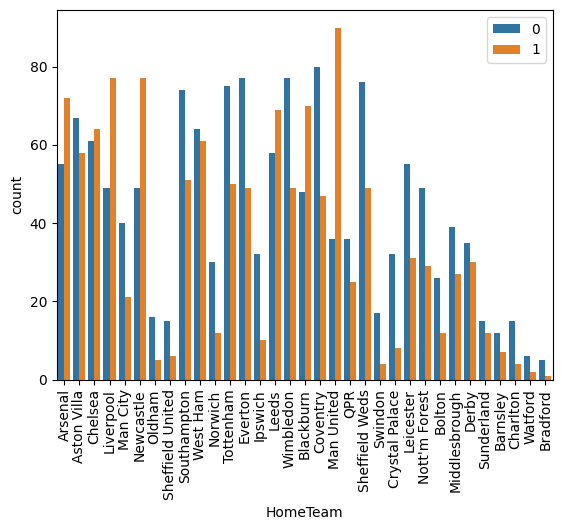

In [12]:
# Generate graphs of home teams and wins i.e FTR[1]
sns.countplot(x = 'HomeTeam', hue = 'FTR', data = df1)

# Rotate the x labels by 90 degrees
plt.xticks(rotation = 90)

# Remove the list of items before graph
plt.legend(loc = 'upper right')

# Model Creation and Analysis

In [15]:
#Standardizing indexes four and five
# Selecting all rows of the columns 4 (FTHG) and 5 (FTAG)
features = df1.iloc[:, 4:6]
scaler = StandardScaler()

# Fit and transform the data and save it to variable X
X = scaler.fit(features)

X = scaler.transform(features)

In [16]:
# Save game outcomes as variable y
y = df1['FTR']

In [17]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [18]:
# Run the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Checking accuracy of the model

In [19]:
# Check model accuracy
# predict with the classifier using the .predict() function
y_pred = model.predict(X_test)

# check the accuracy of the model using the .score() function
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [21]:
# Check precision recall
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      1.00      1.00       237

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520

